In [2]:
import pandas as pd
import os

# Define the file path
file_path = r"C:\Users\Kyle\Desktop\Grad School\IS Demo\Phase 2 Rebuild\Phase 3\Final Files\LAiSER Final Results.csv"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
    # Try to find CSV files in the directory
    directory = os.path.dirname(file_path)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    if csv_files:
        print(f"Available CSV files in the directory: {csv_files}")
    else:
        print("No CSV files found in the directory.")
else:
    # Load the data
    df = pd.read_csv(file_path)
    
    # Basic counts
    total_mappings = len(df)
    unique_afscs = df['Research ID'].nunique()
    unique_raw_skills = df['Raw Skill'].nunique()
    unique_skill_tags = df['Skill Tag'].nunique()
    
    # Skills per AFSC
    skills_per_afsc = df.groupby('Research ID').size()
    avg_skills = skills_per_afsc.mean()
    min_skills = skills_per_afsc.min()
    max_skills = skills_per_afsc.max()
    
    # Confidence metrics
    avg_correlation = df['Correlation Coefficient'].mean()
    high_confidence = (df['Correlation Coefficient'] > 0.90).sum() / len(df)
    very_high_confidence = (df['Correlation Coefficient'] > 0.95).sum() / len(df)
    
    # Cross-AFSC analysis
    skill_frequency = df.groupby('Skill Tag')['Research ID'].nunique()
    universal_skills = skill_frequency[skill_frequency > 0.2 * unique_afscs].count()
    unique_skills = skill_frequency[skill_frequency == 1].count()
    
    # Top skills
    top_skills = df['Skill Tag'].value_counts().head(10)
    
    # AFSC with most/least skills
    afsc_skill_counts = skills_per_afsc.sort_values(ascending=False)
    top_afscs = afsc_skill_counts.head(5)
    bottom_afscs = afsc_skill_counts.tail(5)
    
    # Print results
    print("\n===== LAiSER EXTRACTION ANALYSIS =====\n")
    
    print(f"Total skill mappings: {total_mappings}")
    print(f"Unique AFSCs covered: {unique_afscs}")
    print(f"Unique raw skill phrases: {unique_raw_skills}")
    print(f"Unique skill taxonomy tags: {unique_skill_tags}")
    
    print("\n----- AFSC COVERAGE -----")
    print(f"Average skills per AFSC: {avg_skills:.1f}")
    print(f"Skill range: {min_skills} to {max_skills} per AFSC")
    
    print("\n----- TOP 5 AFSCs BY SKILL COUNT -----")
    for afsc, count in top_afscs.items():
        print(f"{afsc}: {count} skills")
        
    print("\n----- BOTTOM 5 AFSCs BY SKILL COUNT -----")
    for afsc, count in bottom_afscs.items():
        print(f"{afsc}: {count} skills")
    
    print("\n----- CONFIDENCE METRICS -----")
    print(f"Average correlation coefficient: {avg_correlation:.3f}")
    print(f"High confidence mappings (>0.90): {high_confidence:.1%}")
    print(f"Very high confidence mappings (>0.95): {very_high_confidence:.1%}")
    
    print("\n----- CROSS-AFSC ANALYSIS -----")
    print(f"Universal skills (present in >20% of AFSCs): {universal_skills}")
    print(f"AFSC-unique skills (present in only one AFSC): {unique_skills}")
    
    print("\n----- TOP 10 MOST FREQUENT SKILLS -----")
    for skill, count in top_skills.items():
        print(f"{skill}: {count} occurrences")


===== LAiSER EXTRACTION ANALYSIS =====

Total skill mappings: 2352
Unique AFSCs covered: 123
Unique raw skill phrases: 289
Unique skill taxonomy tags: 337

----- AFSC COVERAGE -----
Average skills per AFSC: 19.1
Skill range: 1 to 158 per AFSC

----- TOP 5 AFSCs BY SKILL COUNT -----
AFSC of commissioned officers in training under the School of Medicine Uniformed Services of Health Sciences Program (AFI 41- 110).: 158 skills
AFSC 71S1, Entry: 126 skills
AFSC 62E1*, Entry: 84 skills
AFSC 65W1, Entry: 78 skills
AFSC 16K1, Entry: 76 skills

----- BOTTOM 5 AFSCs BY SKILL COUNT -----
AFSC 44G1, Entry: 1 skills
AFSC 44F1*, Entry: 1 skills
AFSC 16P1, Entry: 1 skills
AFSC 42N1, Entry: 1 skills
AFSC 16F1*, Entry: 1 skills

----- CONFIDENCE METRICS -----
Average correlation coefficient: 0.881
High confidence mappings (>0.90): 18.6%
Very high confidence mappings (>0.95): 3.4%

----- CROSS-AFSC ANALYSIS -----
Universal skills (present in >20% of AFSCs): 15
AFSC-unique skills (present in only one AF

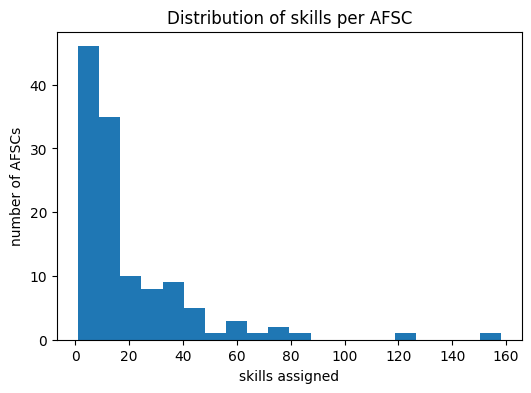

C:\Users\Kyle\AppData\Local\Temp\ipykernel_9268\3577572639.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(top15.index, rotation=65, ha="right", fontsize=8)


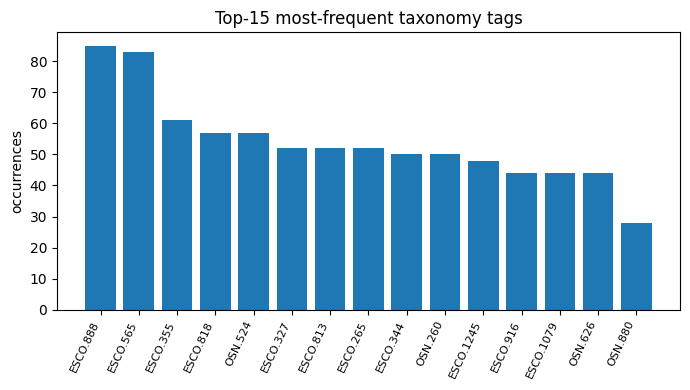

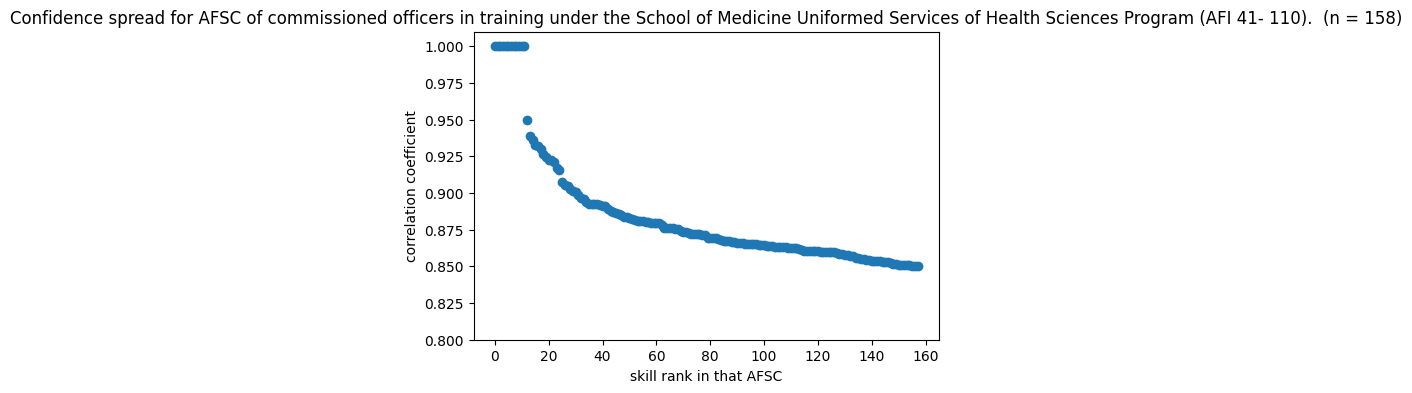

In [3]:
# ───────────────────────────────────────────────────────────────
#  LAiSER quick‑look visualisations   (matplotlib only, no seaborn)
# ───────────────────────────────────────────────────────────────
import matplotlib.pyplot as plt
import numpy as np

# 1) Histogram – how many skills did each AFSC receive?
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.hist(skills_per_afsc.values, bins=20)
ax1.set_title("Distribution of skills per AFSC")
ax1.set_xlabel("skills assigned")
ax1.set_ylabel("number of AFSCs")
plt.show()

# 2) Top‑15 skill tags across ALL AFSCs
top15 = df["Skill Tag"].value_counts().head(15)
fig2, ax2 = plt.subplots(figsize=(7,4))
ax2.bar(top15.index, top15.values)
ax2.set_title("Top‑15 most‑frequent taxonomy tags")
ax2.set_xticklabels(top15.index, rotation=65, ha="right", fontsize=8)
ax2.set_ylabel("occurrences")
plt.tight_layout()
plt.show()

# 3) Correlation‑vs‑rank scatter for the AFSC with MOST skills
star_afsc = skills_per_afsc.idxmax()
subset     = df[df["Research ID"] == star_afsc].sort_values("Correlation Coefficient", ascending=False)

fig3, ax3 = plt.subplots(figsize=(6,4))
ax3.scatter(range(len(subset)), subset["Correlation Coefficient"])
ax3.set_title(f"Confidence spread for {star_afsc}  (n = {len(subset)})")
ax3.set_xlabel("skill rank in that AFSC")
ax3.set_ylabel("correlation coefficient")
ax3.set_ylim(0.8, 1.01)             # focus on HQ range
plt.show()
